* Gmsh: http://gmsh.info/doc/texinfo/gmsh.html#Tutorial

## 几何

* 边界表示 （boundary representation, BRep), 用自下而上的方式构建几何体。
* 几何实体的集合， physical groups
* 脚本语言创建完全参数化的几何实体

## 网格

* 非结构的网格
* 单元中的节点有顺序， 但单元没有顺序
* 自下而上方式生成网格

## 解法器

* 外部解法器可以接入到 Gmsh 中

## 后处理

* Gmsh 可以载入和处理几何和网格中的标量，向量，张量数据

## Gmsh 可以做什么？

* 快速描述简单的几何体
* 参数化几何体
* 生成CAD模型各个维数的有限元网格
* 精确指定目标单元尺寸
* 创建简单的拉伸几何形状和网格 
* 通过简单的客户端-服务器架构和外部的解法器互动
* 以丰富的方式可视化数据

In [2]:
pygmsh.generate_mesh??

In [1]:
import pygmsh
import numpy as np
import matplotlib.pyplot as plt
from fealpy.mesh.TriangleMesh import TriangleMesh 
%matplotlib inline

Info    : Running 'gmsh -3 -bin /tmp/tmps5efgf6o.geo -o /tmp/tmpyse44jgi.msh -optimize_lloyd 10' [Gmsh 3.0.7, 1 node, max. 1 thread]
Info    : Started on Wed Nov  8 15:23:55 2017
Info    : Reading '/tmp/tmps5efgf6o.geo'...
Info    : Done reading '/tmp/tmps5efgf6o.geo'
Info    : Finalized high order topology of periodic connections
Info    : Meshing 1D...
Info    : Meshing curve 2 (Ellipse)
Info    : Meshing curve 3 (Ellipse)
Info    : Meshing curve 7 (Ellipse)
Info    : Meshing curve 10 (Line)
Info    : Meshing curve 11 (Line)
Info    : Meshing curve 12 (Ellipse)
Info    : Meshing curve 13 (Ellipse)
Info    : Meshing curve 14 (Ellipse)
Info    : Meshing curve 15 (Line)
Info    : Meshing curve 16 (Line)
Info    : Meshing curve 17 (Ellipse)
Info    : Meshing curve 18 (Ellipse)
Info    : Meshing curve 19 (Line)
Info    : Meshing curve 20 (Line)
Info    : Meshing curve 21 (Line)
Info    : Meshing curve 22 (Line)
Info    : Meshing curve 23 (Ellipse)
Info    : Meshing curve 24 (Ellipse)
Info

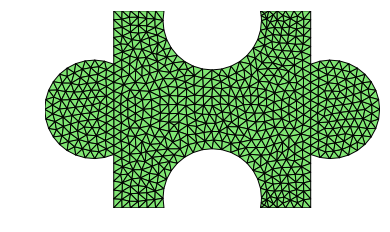

In [4]:
geom = pygmsh.opencascade.Geometry(
  characteristic_length_min=0.1,
  characteristic_length_max=0.1,
  )

rectangle = geom.add_rectangle([-1.0, -1.0, 0.0], 2.0, 2.0)
disk1 = geom.add_disk([-1.2, 0.0, 0.0], 0.5)
disk2 = geom.add_disk([+1.2, 0.0, 0.0], 0.5)
union = geom.boolean_union([rectangle, disk1, disk2])

disk3 = geom.add_disk([0.0, -0.9, 0.0], 0.5)
disk4 = geom.add_disk([0.0, +0.9, 0.0], 0.5)
flat = geom.boolean_difference([union], [disk3, disk4])

#geom.extrude(flat, [0, 0, 0.3])

point, cell, point_data, cell_data, field_data = pygmsh.generate_mesh(geom)

tmesh = TriangleMesh(point[:, 0:2], cell['triangle'])
fig = plt.figure()
axes = fig.gca()
tmesh.add_plot(axes)
plt.show()

Info    : Running 'gmsh -3 -bin /tmp/tmpkp0gfx7a.geo -o /tmp/tmpwojv2449.msh -optimize_lloyd 10' [Gmsh 3.0.7, 1 node, max. 1 thread]
Info    : Started on Wed Nov  8 16:21:21 2017
Info    : Reading '/tmp/tmpkp0gfx7a.geo'...
Info    : Done reading '/tmp/tmpkp0gfx7a.geo'
Info    : Finalized high order topology of periodic connections
Info    : Meshing 1D...
Info    : Meshing curve 1 (Line)
Info    : Meshing curve 2 (Line)
Info    : Meshing curve 3 (Line)
Info    : Meshing curve 4 (Line)
Info    : Meshing curve 5 (Line)
Info    : Meshing curve 6 (Line)
Info    : Meshing curve 7 (Line)
Info    : Meshing curve 8 (Line)
Info    : Done meshing 1D (0 s)
Info    : Meshing 2D...
Info    : Meshing surface 10 (Plane, Delaunay)
Lloyd: 0 17.197
Lloyd: 1 21.143
Lloyd: 2 21.962
Lloyd: 3 23.058
Lloyd: 4 24.434
Lloyd: 5 25.292
Lloyd: 6 25.695
Lloyd: 7 26.636
Lloyd: 8 26.957
Lloyd: 9 27.767
Lloyd: 10 28.028
Lloyd: 11 28.191
Lloyd: 12 28.607
Lloyd: 13 28.715
Lloyd: 14 29.070
Lloyd: 15 29.533
Lloyd: 16 29.6

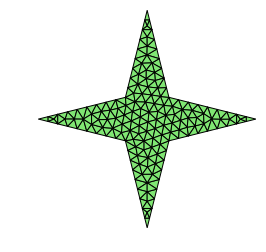

In [5]:
geom = pygmsh.built_in.Geometry()

# Draw a cross.
poly = geom.add_polygon([
    [0.0,   0.5, 0.0],
    [-0.1,  0.1, 0.0],
    [-0.5,  0.0, 0.0],
    [-0.1, -0.1, 0.0],
    [0.0,  -0.5, 0.0],
    [0.1,  -0.1, 0.0],
    [0.5,   0.0, 0.0],
    [0.1,   0.1, 0.0]
    ],
    lcar=0.05
    )

#axis = [0, 0, 1]

#geom.extrude(
#    poly,
#    translation_axis=axis,
#    rotation_axis=axis,
#    point_on_axis=[0, 0, 0],
#    angle=2.0 / 6.0 * np.pi
#    )

point, cell, point_data, cell_data, field_data = pygmsh.generate_mesh(geom)
tmesh = TriangleMesh(point[:, 0:2], cell['triangle'])
fig = plt.figure()
axes = fig.gca()
tmesh.add_plot(axes)
plt.show()

In [3]:
geom = pygmsh.built_in.Geometry()

# Draw a cross.
poly = geom.add_polygon([
    [0.0,   0.0, 0.0],
    [1.0,   0.0, 0.0],
    [1.0,   1.0, 0.0],
    [0.0,   1.0, 0.0],],
    lcar=0.05
    )
geom.add_polygon??
p0 = geom.add_point([0.5, 0.5, 0.0], 0.05)
p1 = geom.add_point([0.8, 0.9, 0.0], 0.05)
line0 = geom.add_line(p0, p1)
geom.add_line_in_surface(line0, poly.surface)

#axis = [0, 0, 1]

#geom.extrude(
#    poly,
#    translation_axis=axis,
#    rotation_axis=axis,
#    point_on_axis=[0, 0, 0],
#    angle=2.0 / 6.0 * np.pi
#    )

point, cell, point_data, cell_data, field_data = pygmsh.generate_mesh(geom)
tmesh = TriangleMesh(point[:, 0:2], cell['triangle'])
fig = plt.figure()
axes = fig.gca()
tmesh.add_plot(axes)
plt.show()

ValueError: Single '}' encountered in format string